<h1>Ordinary Least Squares</h1>
<h3>Juan David Rincón Mora</h3>
<h3>2023</h3>

# 1. Introduction.

The main objective of this notebook is to estimate a model of economic interest using the **Ordinary Least Squares (OLS)** method. The process of matrix construction, the estimation of statistics and variables, and the interpretation of the results obtained will be described in detail.

It is important to note that this notebook focuses on the development of the different estimators and statistics necessary for the estimation of the econometric model in terms of programming. It will not go into the mathematical development behind them, beyond presenting the corresponding equations, formulas and interpretations.

Finally, it is relevant to mention that the mathematical, econometric and statistical content presented in this notebook is largely based on the approach and methodology proposed by Judge, Hill, Griffiths, Lütkepohl and Lee (1988).

# 2. Model.

In this notebook it will be estimated the **Capital Asset Pricing Model (CAPM)**, whose objective is to explain the profitability of a financial asset as a function of the market risk it assumes. According to Berk and DeMarzo (2020), the simplest mathematical model of the CAPM is expressed as follows:

$$r_{i} = r_{f} + \beta(E[R_{mkt}]-r_{f})$$

Where $r_{i}$ represents the return on the asset to be valued, $r_{f}$ is the risk-free rate, $\beta$ is the sensitivity of the asset's return to changes in the market portfolio return, therefore, it represents a measure of systemic risk, and $E[R_{mkt}]$ is the expected value of the market return, from which the risk-free rate is subtracted, which corresponds to the market risk premium.

To estimate the model econometrically, first, a small transformation is made to the mathematical expression. The risk-free rate term $r_{f}$ is moved to the left-hand side of the equation, so that the dependent variable is the risk premium generated by the asset itself in relation to the risk-free rate. This results in a new parameter $\alpha$, which represents the intercept and whose interpretation is the natural risk premium of the asset. In addition, the perturbation term $\varepsilon_{t}$ is added, which collects all the unobservable information that affects the model. Thus, the equation of the econometric model is as follows:

$$(r_{t}^i-r_{t}^f) = \alpha + \beta(r_{t}^{mkt}-r_{t}^f) + \varepsilon_{t}$$

It is important to note that the model is built from **time series data**, which explains that each variable is subindexed to a particular time $t$. The superscripts indicate to which type of return each component corresponds according to the initial notation of the mathematical model.

## 2.1. Variables.

In this case, **Amazon** has been chosen as the asset $r^{i}$ to value, identified by its ticker AMZN. Since this stock is mainly listed on the **NASDAQ Composite index**, this index has been taken as the market return $r^{mkt}$. For the risk-free rate $r^{f}$ was used the monthly market rate of the **10-year U.S. Treasury Bond**, represented by the UST10 indicator.

It have been taken the values corresponding to the periods from **January 2015 to December 2022**. It is important to clarify that in the case of AMZN and NASDAQ, prices have not been considered directly, but the monthly yield, i.e. the percentage change with respect to the last price of each month.

The database used for this exercise is available at the following link: <u>[*Amazon CAPM data*](https://github.com/JuanDavidR24/Econometria_Basica/blob/532b8dc625b8a9a3bd3f1b10b12b226d9b91b390/Datasets/Amazon%20CAPM%20data.xlsx)</u>. The first values of the database are presented below:

In [64]:
#install pandas, tk, openpyxl (py pip install ...)
import pandas as pd
import tkinter as tk
from tkinter import filedialog

# Import data.
file1 = filedialog.askopenfilename()
DATA = pd.read_excel(file1, sheet_name="DATA")

# First values of data.
DATA.head()

,Date,AMZN,NASDAQ,UST10y,AMZN Rtrn,NASDAQ Rtrn,UST10 mv
0,2015-01-30,17.73,4635.24,0.01639,0.142397,-0.021286,0.001356
1,2015-02-27,19.01,4963.53,0.01996,0.072194,0.070825,0.001648
2,2015-03-31,18.61,4900.88,0.01927,-0.021042,-0.012622,0.001592
3,2015-04-30,21.09,4941.42,0.02035,0.133262,0.008272,0.001680
4,2015-05-29,21.46,5070.02,0.02128,0.017544,0.026025,0.001756


### 2.1.1. Graphical representation.

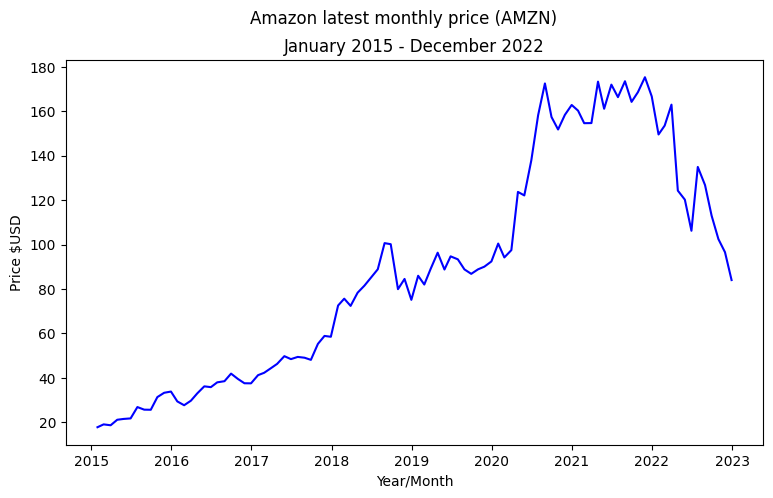

In [65]:
#py pip install matplotlib
import matplotlib.pyplot as plt

# Amazon Prices Graph.
plt.figure(figsize=(9, 5))
plt.plot(DATA['Date'], DATA['AMZN'], color='blue')
plt.xlabel('Year/Month')
plt.ylabel('Price $USD')
plt.suptitle('Amazon latest monthly price (AMZN)')
plt.title('January 2015 - December 2022')
plt.show()

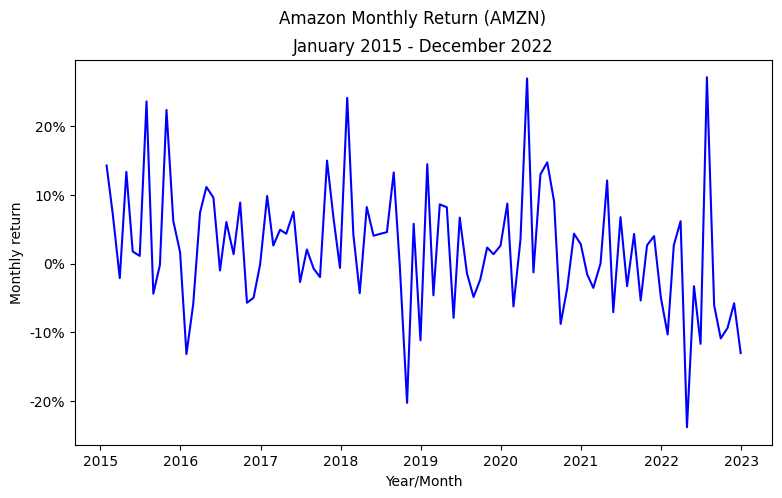

In [66]:
# Amazon Returns Graph.
plt.figure(figsize=(9, 5))
plt.plot(DATA['Date'], DATA['AMZN Rtrn'], color='blue')
plt.xlabel('Year/Month')
plt.ylabel('Monthly return')
plt.suptitle('Amazon Monthly Return (AMZN)')
plt.title('January 2015 - December 2022')
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.show()

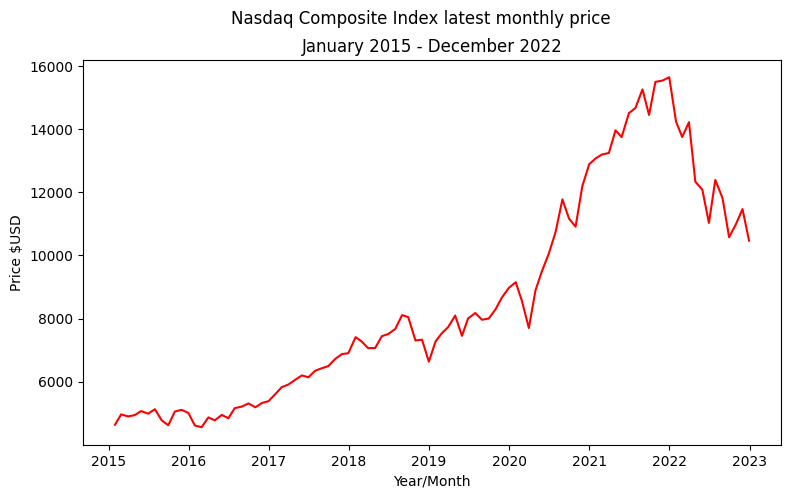

In [67]:
# NASDAQ Prices Graph
plt.figure(figsize=(9, 5))
plt.plot(DATA['Date'], DATA['NASDAQ'], color='red')
plt.xlabel('Year/Month')
plt.ylabel('Price $USD')
plt.suptitle('Nasdaq Composite Index latest monthly price')
plt.title('January 2015 - December 2022')
plt.show()

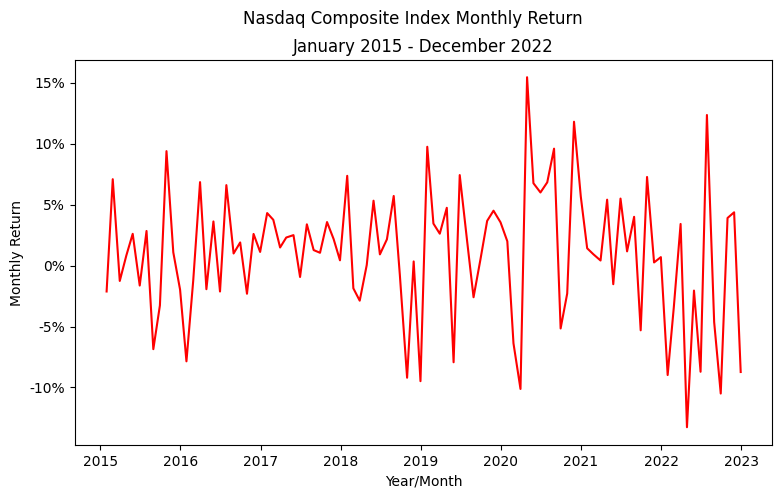

In [68]:
# NASDAQ Returns Graph
plt.figure(figsize=(9, 5))
plt.plot(DATA['Date'], DATA['NASDAQ Rtrn'], color='red')
plt.xlabel('Year/Month')
plt.ylabel('Monthly Return')
plt.suptitle('Nasdaq Composite Index Monthly Return')
plt.title('January 2015 - December 2022')
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.show()

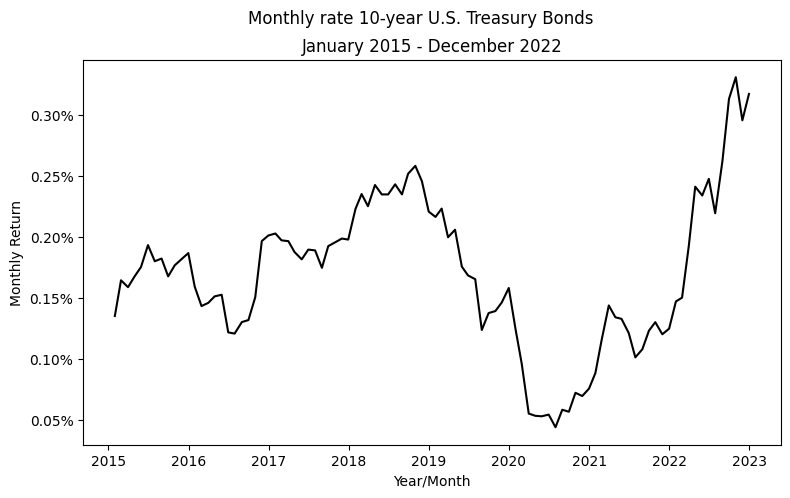

In [69]:
# 10-year Treasury Bonds Graph
plt.figure(figsize=(9, 5))
plt.plot(DATA['Date'], DATA['UST10 mv'], color='black')
plt.xlabel('Year/Month')
plt.ylabel('Monthly Return')
plt.suptitle('Monthly rate 10-year U.S. Treasury Bonds')
plt.title('January 2015 - December 2022')
plt.gca().yaxis.set_major_formatter('{:.2%}'.format)
plt.show()

### 2.1.2. Construction of model variables.

First, each variable is extracted in individual vectors:

In [70]:
#py pip install numpy
import numpy as np

# Amazon, Ri.
ri = np.array(DATA['AMZN Rtrn'])

# Nasdaq, Rmkt.
rmkt = np.array(DATA['NASDAQ Rtrn'])

# UST 10y Bonds, Rf.
rf = np.array(DATA['UST10 mv'])

Then the variables that will actually be used in the model are constructed, i.e. the asset's own risk premium and the market risk premium:

In [71]:
# Assets Risk Premium, Ri-Rf.
ri_rf = ri - rf

# Market Risk Premium, Rmkt-Rf.
rmkt_rf = rmkt - rf

# 3. OLS Estimation.

The following model is estimated using the Ordinary Least Squares (OLS) method in matrix form:

$$Y = X\beta + e$$

Where $Y$ is a matrix of size $T \times 1$ that contains the values of the dependent variable, $X$ is a design matrix of size $T \times K$ that contains the independent variables, $\beta$ is a matrix of size $K \times 1$ that contains the parameters that relate the explanatory variables to the explained variable, and $e$ is a matrix of size $T \times 1$ that contains the unobservable disturbances.

## 3.1. Design matrices.

More specifically, the $Y$ and $X$ matrices, from which the information and data are available, are constructed as follows:

$$Y = \begin{bmatrix} r_{1}^{i} - r_{1}^{f} \\ 
r_{2}^{i} - r_{2}^{f} \\ \vdots \\ 
r_{T}^{i} - r_{T}^{f}
\end{bmatrix}_{T \times 1}
\qquad
X = \begin{bmatrix} 
1 & r_{1}^{mkt}-r_{1}^{f} \\ 
1 & r_{2}^{mkt}-r_{2}^{f} \\ 
\vdots & \vdots \\
1 & r_{T}^{mkt}-r_{T}^{f} \end{bmatrix}_{T \times 2}$$

In [72]:
# Y Matrix (Dependent variable).
Y = np.array(ri_rf).reshape(-1, 1)

# X Matrix (Independent variable).
X = np.column_stack((np.ones_like(rmkt_rf), rmkt_rf))

# Number of observations and variables.
N = X.shape[0]
K = X.shape[1]

## 3.2. Ordinary Least Squares.

The Ordinary Least Squares estimator for the coefficients (betas) of the model, in matrix form, is as follows:

$$\hat{\beta} = \left(X'X \right)^{-1} X'Y$$

In [73]:
# OLS Estimation Function.
def Beta_OLS_f(X, Y):

    # Formula.
    beta_gr = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))

    # Result.
    return beta_gr

# Estimated Betas.
B_gr = Beta_OLS_f(X, Y)
print(B_gr)

[[0.00995743]
 [1.26845673]]


Interpretations of the estimated betas are as follows:

1.  Amazon's natural risk premium, represented by the $\hat{\alpha}$ intercept, is approximately **0.9957%** per month, holding all else constant. This coefficient indicates how much additional return the asset generates no matter what happens to market returns.
2.  Since $\hat{\beta}$ is greater than 1, this indicates that Amazon is more volatile than the market, i.e., it reacts in an amplified manner to positive or negative movements in the NASDAQ. In particular, the coefficient value indicates that given a 1% increase (0.01 in the magnitude of the data) in the market risk premium, Amazon's risk premium increases by approximately **1.2685%** (0.012685), holding all else constant.

## 3.3. Dependent variable estimation.

To find the estimated dependent variable, the matrix $X$ of independent variables is multiplied by the vector $\hat{\beta}$ of coefficients estimated by OLS.

$$\hat{Y} = X \hat{\beta}$$

In [74]:
# Estimated dependent variable.
Y_gr = np.dot(X, B_gr)
print(Y_gr[:6])

[[-0.01876214]
 [ 0.09770484]
 [-0.00807227]
 [ 0.0183188 ]
 [ 0.04074115]
 [-0.01330234]]


## 3.4. Errors estimation.

To estimate the errors, which in principle are not observable, the actual values of the dependent variable and the values estimated by the model are subtracted.

$$\hat{e} = Y - \hat{Y}$$

In [75]:
# Estimated errors.
e_gr = Y - Y_gr
print(e_gr[:6])

[[ 0.15980337]
 [-0.02715912]
 [-0.01456111]
 [ 0.11326267]
 [-0.02495356]
 [ 0.0225492 ]]


## 3.5. Estimated variance of errors.

The unbiased estimator for the variance of the OLS method errors is calculated as follows:

$$\hat{\sigma}^2 = \frac{\hat{e}' \cdot \hat{e}}{T-K}$$

In [76]:
# Estimated Variance Function.
def sigma2_gr_f(errors, T_obs, K_var):

    # Formula.
    sigma2_gr = np.dot(errors.T, errors)/(T_obs - K_var)

    # Result.
    return sigma2_gr

# Estimated Variance.
sigma2_gr = sigma2_gr_f(e_gr, N, K)
print(sigma2_gr)

[[0.00386778]]


In [77]:
# Estimated Standard Deviation.
sigma_gr = np.sqrt(sigma2_gr)
print(sigma_gr)

[[0.06219152]]


## 3.6. Variance-Covariance matrix of betas.

The variance-covariance matrix of the betas estimated by OLS is calculated as follows:

$$\sum_{\hat{\beta}} = \text{VarCov}(\hat{\beta}) =\hat{\sigma}^2 \left(X'X \right)^{-1}$$

For the number of regressors in this model, the matrix contains the following information:

$$\sum_{\hat{\beta}} = \text{VarCov}(\hat{\beta}) = 
\begin{bmatrix} 
Var(\hat{\alpha}) & Cov(\hat{\alpha},\hat{\beta}) \\
Cov(\hat{\beta},\hat{\alpha}) & Var(\hat{\beta}) \\
\end{bmatrix}_{2 \times 2}$$

In [78]:
# Variance-Covariance Matrix.
varcov_beta_gr = sigma2_gr*np.linalg.inv(np.dot(X.T, X))
print(varcov_beta_gr)

[[ 4.11906146e-05 -1.12205166e-04]
 [-1.12205166e-04  1.39704374e-02]]


In [79]:
# Standard deviation of betas.
sd_beta_gr = np.sqrt(np.diagonal(varcov_beta_gr))
print(sd_beta_gr)

[0.00641799 0.1181966 ]


## 3.7. Coefficient of determination.

To measure the goodness of fit of the model, the coefficient of determination $R^2$ is used, which represents the percentage of variability of the dependent variable that is explained by the variability of the explanatory variables of the model. There are two ways to calculate this statistic:

$$\begin{gathered}
R^{2} = \frac{\text{SSR}}{\text{SST}} = 
\frac{\sum_{t=1}^{T}{(\hat{Y}_{t}-\bar{Y})^2}}
{\sum_{t=1}^{T}{(Y_{t}-\bar{Y})^2}} \\
R^{2} = 1- \frac{\text{SSE}}{\text{SST}} = 
1 - \frac{\sum_{t=1}^{T}{(\hat{e}_{t}})^2}
{\sum_{t=1}^{T}{(Y_{t}-\bar{Y})^2}}
\end{gathered}$$

Where $\text{SSR}$ represents the sum of squares explained by regression, $\text{SSE}$ represents the sum of squared errors, and $\text{SST}$ represents the total sum of squares. These three components are defined exactly as shown in the corresponding formulas.

In [80]:
# R2 function.
def R2_f(Y, Y_gr):

    # Sum of squares explained.
    ssr = np.sum((Y_gr-np.mean(Y))**2)

    # Total sum of squares.
    sst = np.sum((Y-np.mean(Y))**2)

    # Formula.
    R2 = ssr/sst
  
    # Result.
    return(R2)

# Coefficient of determination R2.
R2 = R2_f(Y, Y_gr)
print(R2)

0.5506058791745387


This result indicates that approximately **55.1%** of the variability of Amazon's risk premium is explained by the variability of the NASDAQ market risk premium.

### 3.7.1. Adjusted coefficient of determination.

One of the drawbacks of $R^2$ as a goodness-of-fit measure is that its value tends to increase as new explanatory variables are added to the model. This can lead to the misinterpretation that a model with more variables is always better. In reality, some of these additional variables may lack a consistent economic relationship with the model or may not be statistically significant.

To address this problem, the adjusted coefficient of determination $R^{2}_{adj}$ is introduced, which penalizes the increase in $R^2$ as more variables are added to the model. This coefficient is defined as follows:

$$R_{adj}^2 = 1 - \frac{T-1}{T-k-1} (1-R^2)$$

Where $R^2$ is the normal coefficient of determination, $T$ is the total number of observations, and $k$ is the number of regressors without the intercept.

It should be clarified that in this particular case, since the model has only one regressor other than the intercept, it is not necessary to use the adjusted coefficient of determination. However, in order to provide a more complete understanding and for educational purposes, the result of the calculation of the $R^{2}_{adj}$ is presented below.

In [81]:
# Adjusted R2 function.
def R2adj_f(R2, T_obs, K_var):

    # Formula.
    R2adj = 1-((1-R2)*((T_obs-1)/(T_obs-(K_var-1)-1)))

    # Result.
    return R2adj

# Adjusted R2 Coefficient of determination.
R2adj = R2adj_f(R2, N, K)
print(R2adj)

0.545825090655119


This result indicates that, adjusted under the number of regressors, approximately **54.6%** of the variability of Amazon's risk premium is explained by the variability of the NASDAQ market risk premium.

# 4. Use of the model.

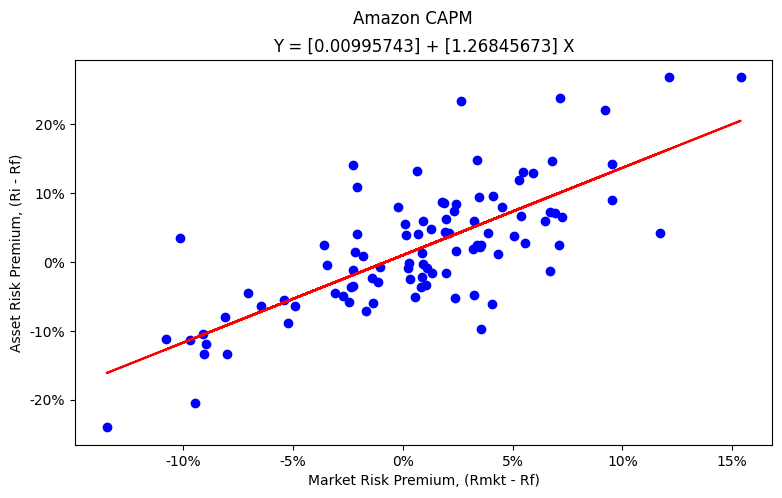

In [82]:
# Graph.
plt.figure(figsize=(9, 5))
plt.scatter(rmkt_rf, ri_rf, color='blue', marker='o')
plt.plot(rmkt_rf, B_gr[0] + B_gr[1] * rmkt_rf, color='red')
plt.xlabel("Market Risk Premium, (Rmkt - Rf)")
plt.ylabel("Asset Risk Premium, (Ri - Rf)")
plt.suptitle("Amazon CAPM")
plt.title(f"Y = {B_gr[0]} + {B_gr[1]} X")

plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.gca().xaxis.set_major_formatter('{:.0%}'.format)

plt.show()

## 4.1. Forecast.

Once the linear regression coefficients have been obtained, they can be used to predict and evaluate Amazon's future profitability. This process is simple and is achieved by substituting any desired value of the market premium into the functional form of the regression model, or by multiplying a transposed vector of information by the matrix of estimated coefficients.

$$\hat{y}_{t} = \hat{\alpha} + x_{t}\hat{\beta} \quad \text{or} \quad \hat{y}_{t} = x'_{t}\hat{\beta}$$

In this way, an estimate of Amazon's future profitability can be obtained using historical data and patterns found in the linear regression model. This approach allows investors to anticipate possible outcomes and make informed decisions about investing in Amazon stock in the future.

### 4.1.1. In-sample forecast.

From the estimated dependent variables $\hat{Y}$, they can be compared with the actual realized values, in this case $y_{t} = r_{t}^i-r_{t}^f$.

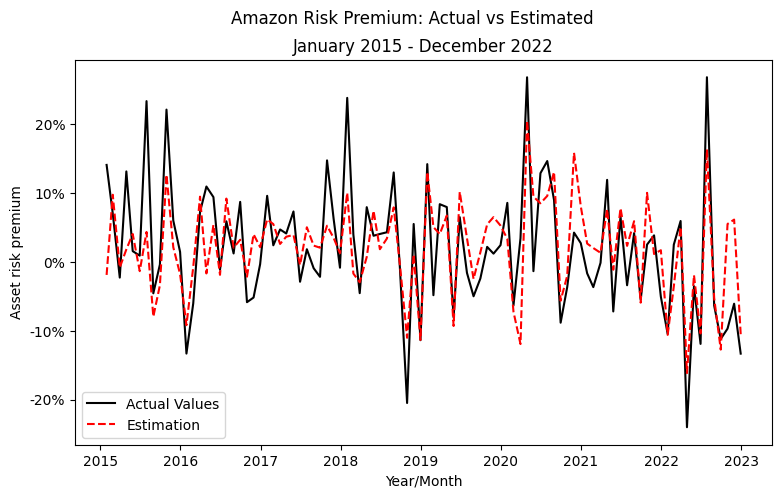

In [83]:
# Graph.
plt.figure(figsize=(9, 5))

plt.plot(DATA['Date'], ri_rf, linestyle='-', color='black', label='Actual Values')
plt.plot(DATA['Date'], Y_gr, linestyle='--', color='red', label='Estimation')

plt.suptitle("Amazon Risk Premium: Actual vs Estimated")
plt.title("January 2015 - December 2022")
plt.xlabel("Year/Month")
plt.ylabel("Asset risk premium")
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.legend(loc='lower left')

plt.show()

When analyzing the series, it can be noted that at several points the estimate resembles the actual realization, at some points the estimate is very close and at others it is far from the actual realization. However, in some cases, the direction of the estimate is completely opposite to that of the realization.

To measure the average estimation error in-sample, the **Mean Absolute Error (MAE)** is calculated, which consists of the arithmetic average of the absolute value of the estimated errors $\hat{e}$ of the sample of size $n$ to be evaluated. The average of the residuals is not taken as it is because, due to estimation properties, this average will always be equal to zero. Therefore, the absolute value is used to avoid this problem and to obtain a more accurate measure of the estimation error. The way to calculate the MAE is as follows:

$$\text{MAE} = 
\frac{\sum_{i=1}^{n}{|y_{i} - \hat{y}_{i}|}}{n} =
\frac{\sum_{i=1}^{n}{|\hat{e}_{i}|}}{n}$$

In [84]:
# Mean absolute error (In-sample).
mae = np.sum(np.abs(e_gr))/N
print(mae)

0.04730879486291693


The result obtained indicates that, considering the sample data, **the model is expected to have an average error of approximately 4.73%**, either positive or negative, when estimating Amazon's risk premium.

To evaluate the direction of estimation, the percentage of coincidences will be calculated, i.e., it will be counted those estimations whose positive or negative direction coincides with the direction of the variable's actual realization. In this way, the ability of the model to predict the appropriate direction of the Amazon risk premium can be determined more accurately.

In [85]:
# Vector of matches.
dMatch = (Y > 0) == (Y_gr > 0)

# Percentage of matches (In-sample).
print(sum(dMatch)/N)

[0.76041667]


The result obtained indicates that **76.04% of the estimates coincide in direction with the actual variable**, while the remaining 23.96% are estimates whose direction is opposite to the true one.

### 4.1.2. Out-of-sample forecast.

To evaluate the out-of-sample model forecast, taking into account that the post-sample comparison window is limited, two types of analysis will be performed. First, pre-sample data will be estimated and compared, specifically from **January 2013 to December 2014**. Second, the most recent post-sample data will be compared, covering only the months of January, February, March and April 2023. It is important to note that the data sample ends in December 2022.

In [86]:
# Import out-of-sample data.
DATA0 = pd.read_excel(file1, sheet_name="Sample0")

# First values of data.
DATA0.head()

,Date,AMZN,AMZN Rtrn,NASDAQ,NASDAQ Rtrn,UST10y,UST10 mv
0,2013-01-31,13.2750,0.058317,3142.129883,0.040609,0.01985,0.001639
1,2013-02-28,13.2135,-0.004633,3160.189941,0.005748,0.01888,0.001560
2,2013-03-28,13.3245,0.008400,3267.520020,0.033963,0.01852,0.001530
3,2013-04-30,12.6905,-0.047582,3328.790039,0.018751,0.01675,0.001385
4,2013-05-31,13.4600,0.060636,3455.909912,0.038188,0.02164,0.001786


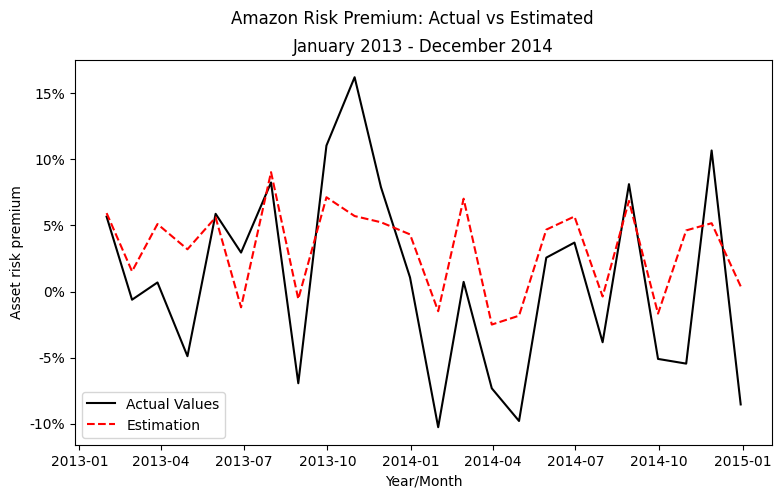

In [87]:
# Initial variables.
ri_0 = DATA0['AMZN Rtrn']
rmkt_0 = DATA0['NASDAQ Rtrn']
rf_0 = DATA0['UST10 mv']

# Model variables.
ri_rf_0 = ri_0 - rf_0
rmkt_rf_0 = rmkt_0 - rf_0

# Design matrices.
Y0 = np.array(ri_rf_0).reshape(-1,1)
X0 = np.column_stack((np.ones_like(rmkt_rf_0), rmkt_rf_0))

# Forecast.
Y0_gr = np.dot(X0, B_gr)

# Out-of-sample forecast graph.
plt.figure(figsize=(9, 5))

plt.plot(DATA0['Date'], ri_rf_0, linestyle='-', color='black', label='Actual Values')
plt.plot(DATA0['Date'], Y0_gr, linestyle='--', color='red', label='Estimation')

plt.suptitle("Amazon Risk Premium: Actual vs Estimated")
plt.title("January 2013 - December 2014")
plt.xlabel("Year/Month")
plt.ylabel("Asset risk premium")
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.legend(loc='lower left')

plt.show()

In [88]:
# Mean absolute error (Out-of-sample).
e0_gr = Y0 - Y0_gr
mae0 = np.mean(np.abs(e0_gr))
print(mae0)

0.04647277216505683


In [89]:
# Vector of matches (Out-of-sample).
dMatch0 = (Y0 > 0) == (Y0_gr > 0)

# Percentage of matches (Out-of-sample).
print(sum(dMatch0)/len(Y0))

[0.79166667]


From these results it can be seen that the forecasting ability of the model does not differ significantly when evaluated with out-of-sample data. Amazon's estimated profitability series, plotted along with the actual realization of profitability during 2013 and 2014, shows similar behavior at most points. Specifically, for this comparison case, the mean absolute estimation error (positive or negative) was found to be **4.65%**, and for the direction estimate, the percentage of matches was approximately **79.17%**.

Next, the forecast quality of the model will be evaluated using the most recent post-sample data. For this purpose, NASDAQ monthly return and risk-free rate data for the period January to April 2023 will be used.

|          | NASDAQ Monthly Return | UST10Y Monthly Risk-free rate |
|----------|:---------------------:|:-----------------------------:|
| January  |        10.68%         |            0.2894%            |
| February |        -1.11%         |            0.3206%            |
| March    |         6.69%         |            0.2866%            |
| April    |         0.04%         |            0.2832%            |

With this information, vectors are constructed individually with the data corresponding to each month and the forecast is made.

In [90]:
# Vectors of information.
xjan = np.array((1, 0.1068 - 0.002894))
xfeb = np.array((1, -0.0111 - 0.003206))
xmar = np.array((1, 0.0669 - 0.002866))
xapr = np.array((1, 0.0004 - 0.002832))

frcstA = np.array([np.dot(xjan, B_gr), np.dot(xfeb, B_gr), np.dot(xmar, B_gr), np.dot(xapr, B_gr)])

# Forecast.
frcstM = pd.DataFrame({
    "Month": np.array(["January", "February", "March", "April"]).flatten(),
    "Estimate": np.round(frcstA.flatten(), decimals=6)
})

print(frcstM)

      Month  Estimate
0   January  0.141758
1  February -0.008189
2     March  0.091182
3     April  0.006873


|          | Actual Amazon risk premium | Estimated Amazon risk premium | Estimation error |
|----------|:--------------------------:|:-----------------------------:|:----------------:|
| January  |           22.48%           |            14.18%             |       8.3%       |
| February |           -8.95%           |            -0.82%             |      -8.13%      |
| March    |           9.33%            |             9.12%             |       0.2%       |
| April    |           2.09%            |             0.69%             |      1.40%       |

The results indicate that for these four months the mean absolute error of estimation is **4.51%** and that in all forecasts made, the model was correct in the direction of the percentage change or profitability.

# 5. Conclusions.

The objective of this document was to build a CAPM model to value and estimate the monthly return of Amazon (AMZN), using the monthly return of the NASDAQ market and the risk-free rate measured as the market rate converted to monthly of 10-year U.S. Treasury bonds. The exercise was carried out for pedagogical purposes to review step by step the estimation process and its application in terms of programming.

Regarding the estimated coefficients of the model, it was found that Amazon generates on average a 1% risk premium, holding all else constant, and that its sensitivity to market movements is amplified, 1.27 times the changes in the NASDAQ market premium.

As for the quality and usefulness of the model in terms of forecasting, it was evaluated with in-sample and out-of-sample data, and it is concluded that the estimation error is between 4.5% to 5%, and that the model accurately predicts the direction of Amazon's percentage change, with a match rate of 75% to 80%. The model is considered to be very useful for making decisions to buy or sell Amazon shares and the predicted value can be used as a take profit or target value. However, it is important to note that when the forecast is around 0%, the variance of residuals and the average estimation error indicate that the asset can go in either positive or negative direction.

It is noted that this model is constructed in a simple manner and is only based on past price information, which implies that it may not fully capture other aspects that affect Amazon's profitability. Furthermore, in terms of model utilization, it is noted that the NASDAQ monthly risk premium and risk-free rate, which are necessary for forecasting, are not known until the end of the month, just when Amazon's monthly return value is also known. Therefore, as a complement to this model, it would be interesting to build another model that allows forecasting at least one month ahead the NASDAQ prices and the risk-free rate. In this way, the present CAPM could be fully utilized and the profitability of Amazon's stock could be predicted in a timely manner in order to make investment decisions that generate value.

# References.

Berk, J. & DeMarzo, P. (2020). Optimal Portfolio Choice and the Capital Asset Pricing Model. *Corporate Finance* (pp. 393-443). Pearson Education.

Judge G., Hill R., Griffiths W., Lütkepohl H. & Lee T. (1988). Introduction to the Theory and Practice of Econometrics. John Wiley & Sons.